# Hamilton Monte Carlo

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import numpy as np
import matplotlib.pyplot as plt

from src.hmc_numpy import hamiltonian_sample

In [2]:
def f(x, a=1, b=100):
    """
    Rosenbrock function (Banana function)
    """
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

def grad_f(x, a=1, b=100):
    """
    Gradient of the Rosenbrock function
    """
    dfdx = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    dfdy = 2 * b * (x[1] - x[0]**2)
    return dfdx, dfdy

In [3]:
num_samples = 10000
L = 50
step_size = 0.01
x_init = np.array([-2, -1])

samples = hamiltonian_sample(x_init, f, grad_f, num_samples, L, step_size, mass=10)

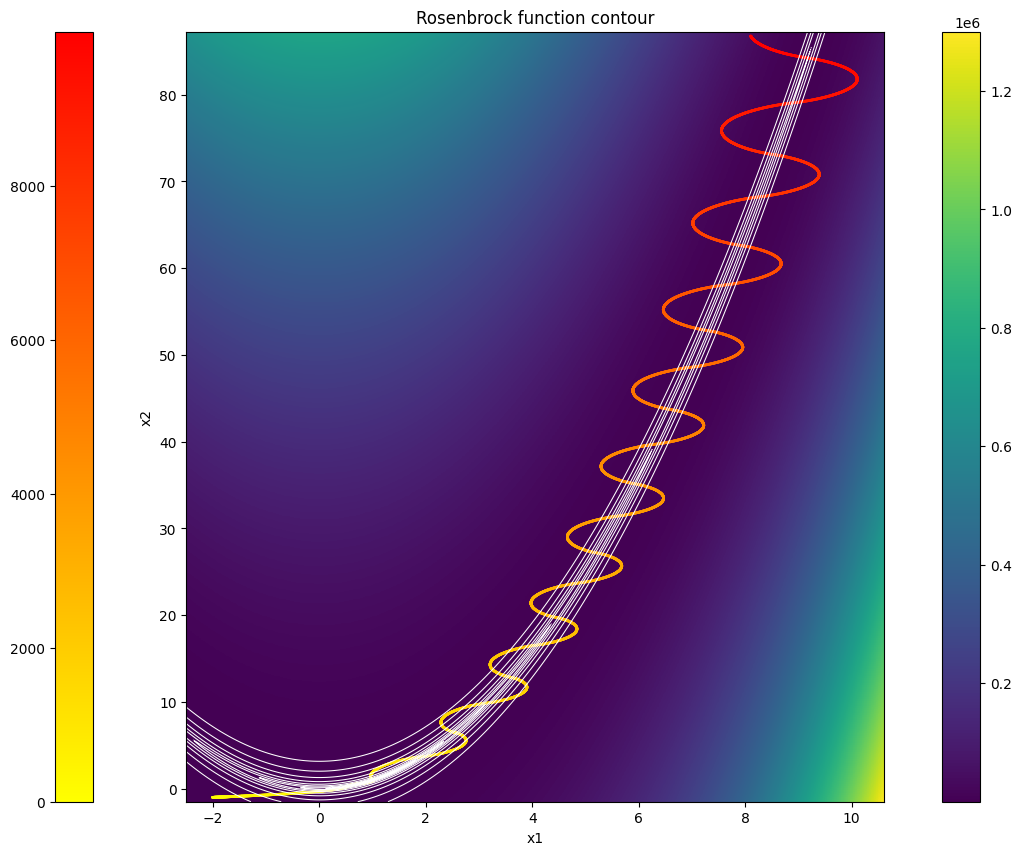

In [ ]:
# plot contour of f
plt.figure(figsize=(15, 10))
# x_space, y_space = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-1, 3, 1000))
x_min, x_max = np.min(samples[:, 0]), np.max(samples[:, 0])
y_min, y_max = np.min(samples[:, 1]), np.max(samples[:, 1])
x_space, y_space = np.meshgrid(np.linspace(x_min-0.5, x_max+0.5, 1000), np.linspace(y_min-0.5, y_max+0.5, 1000))
Z_small = (1 - x_space)**2 + 100 * (y_space - x_space**2)**2
plt.contour(x_space, y_space, Z_small, levels=np.logspace(-0.5, 3, 10), colors='white', linewidths=0.75)
plt.imshow(
    Z_small,
    extent=[x_space.min(), x_space.max(), y_space.min(), y_space.max()],
    origin='lower',
    cmap='viridis',
    interpolation='nearest',
    aspect='auto'
)
plt.colorbar()
plt.scatter(
    samples[:, 0],
    samples[:, 1],
    c=np.arange(len(samples)),  # color by sample index
    s=1,  # point size
    alpha=1,  # transparency
    cmap='autumn_r'
)
plt.colorbar(orientation='vertical', location='left')
plt.title('Rosenbrock function contour')
plt.xlabel('x1')
plt.ylabel('x2')
# plt.axis('equal')
plt.show()